# BLIP-2 for caption generation

BLIP-2 : Bootstrapping Language-Image Pre-training with frozen unimodal model is a vision language pre-training method that bootstraps from frozen pre-trained unimodal models. 

Its advantages are: 
- It leverages both frozen image pre-trained models and language models. 

- With the help of LLMs, BLIP - 2 can be prompted to perform zero shot image-to-text generation that follows natural language instructions, that opens the doors for implementing visual knowledge reasoning, visual conversation etc.

- Due to the use of frozen unimodal models and a lightweight Q-former, BLIP-2 is more compute efficient.

more here: [BLIP-2](https://arxiv.org/pdf/2301.12597)

In [2]:
from PIL import Image
import requests
from transformers import Blip2Processor, Blip2ForConditionalGeneration, BitsAndBytesConfig
import torch
import matplotlib.pyplot as plt

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [4]:
processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
quantization_config = BitsAndBytesConfig(load_in_8bit=True)
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b",quantization_config = quantization_config)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.19s/it]


In [5]:
fs_images = [
    "../images/apple.jpg",
    "../images/test_monkey.jpg",
    "../images/sparrow.jpg",
    "../images/sunset.jpg",
    "../images/nepal_flag.jpg"
]

In [6]:
captions = []

In [7]:
for single_image in fs_images:
    image  = Image.open(single_image).convert("RGB")
    inputs = processor(images=image, return_tensors = "pt").to(device, torch.float16)
    generate_ids = model.generate(**inputs, max_new_tokens = 20)
    generate_text = processor.batch_decode(generate_ids, skip_special_tokens = True)[0]
    captions.append(generate_text)
    

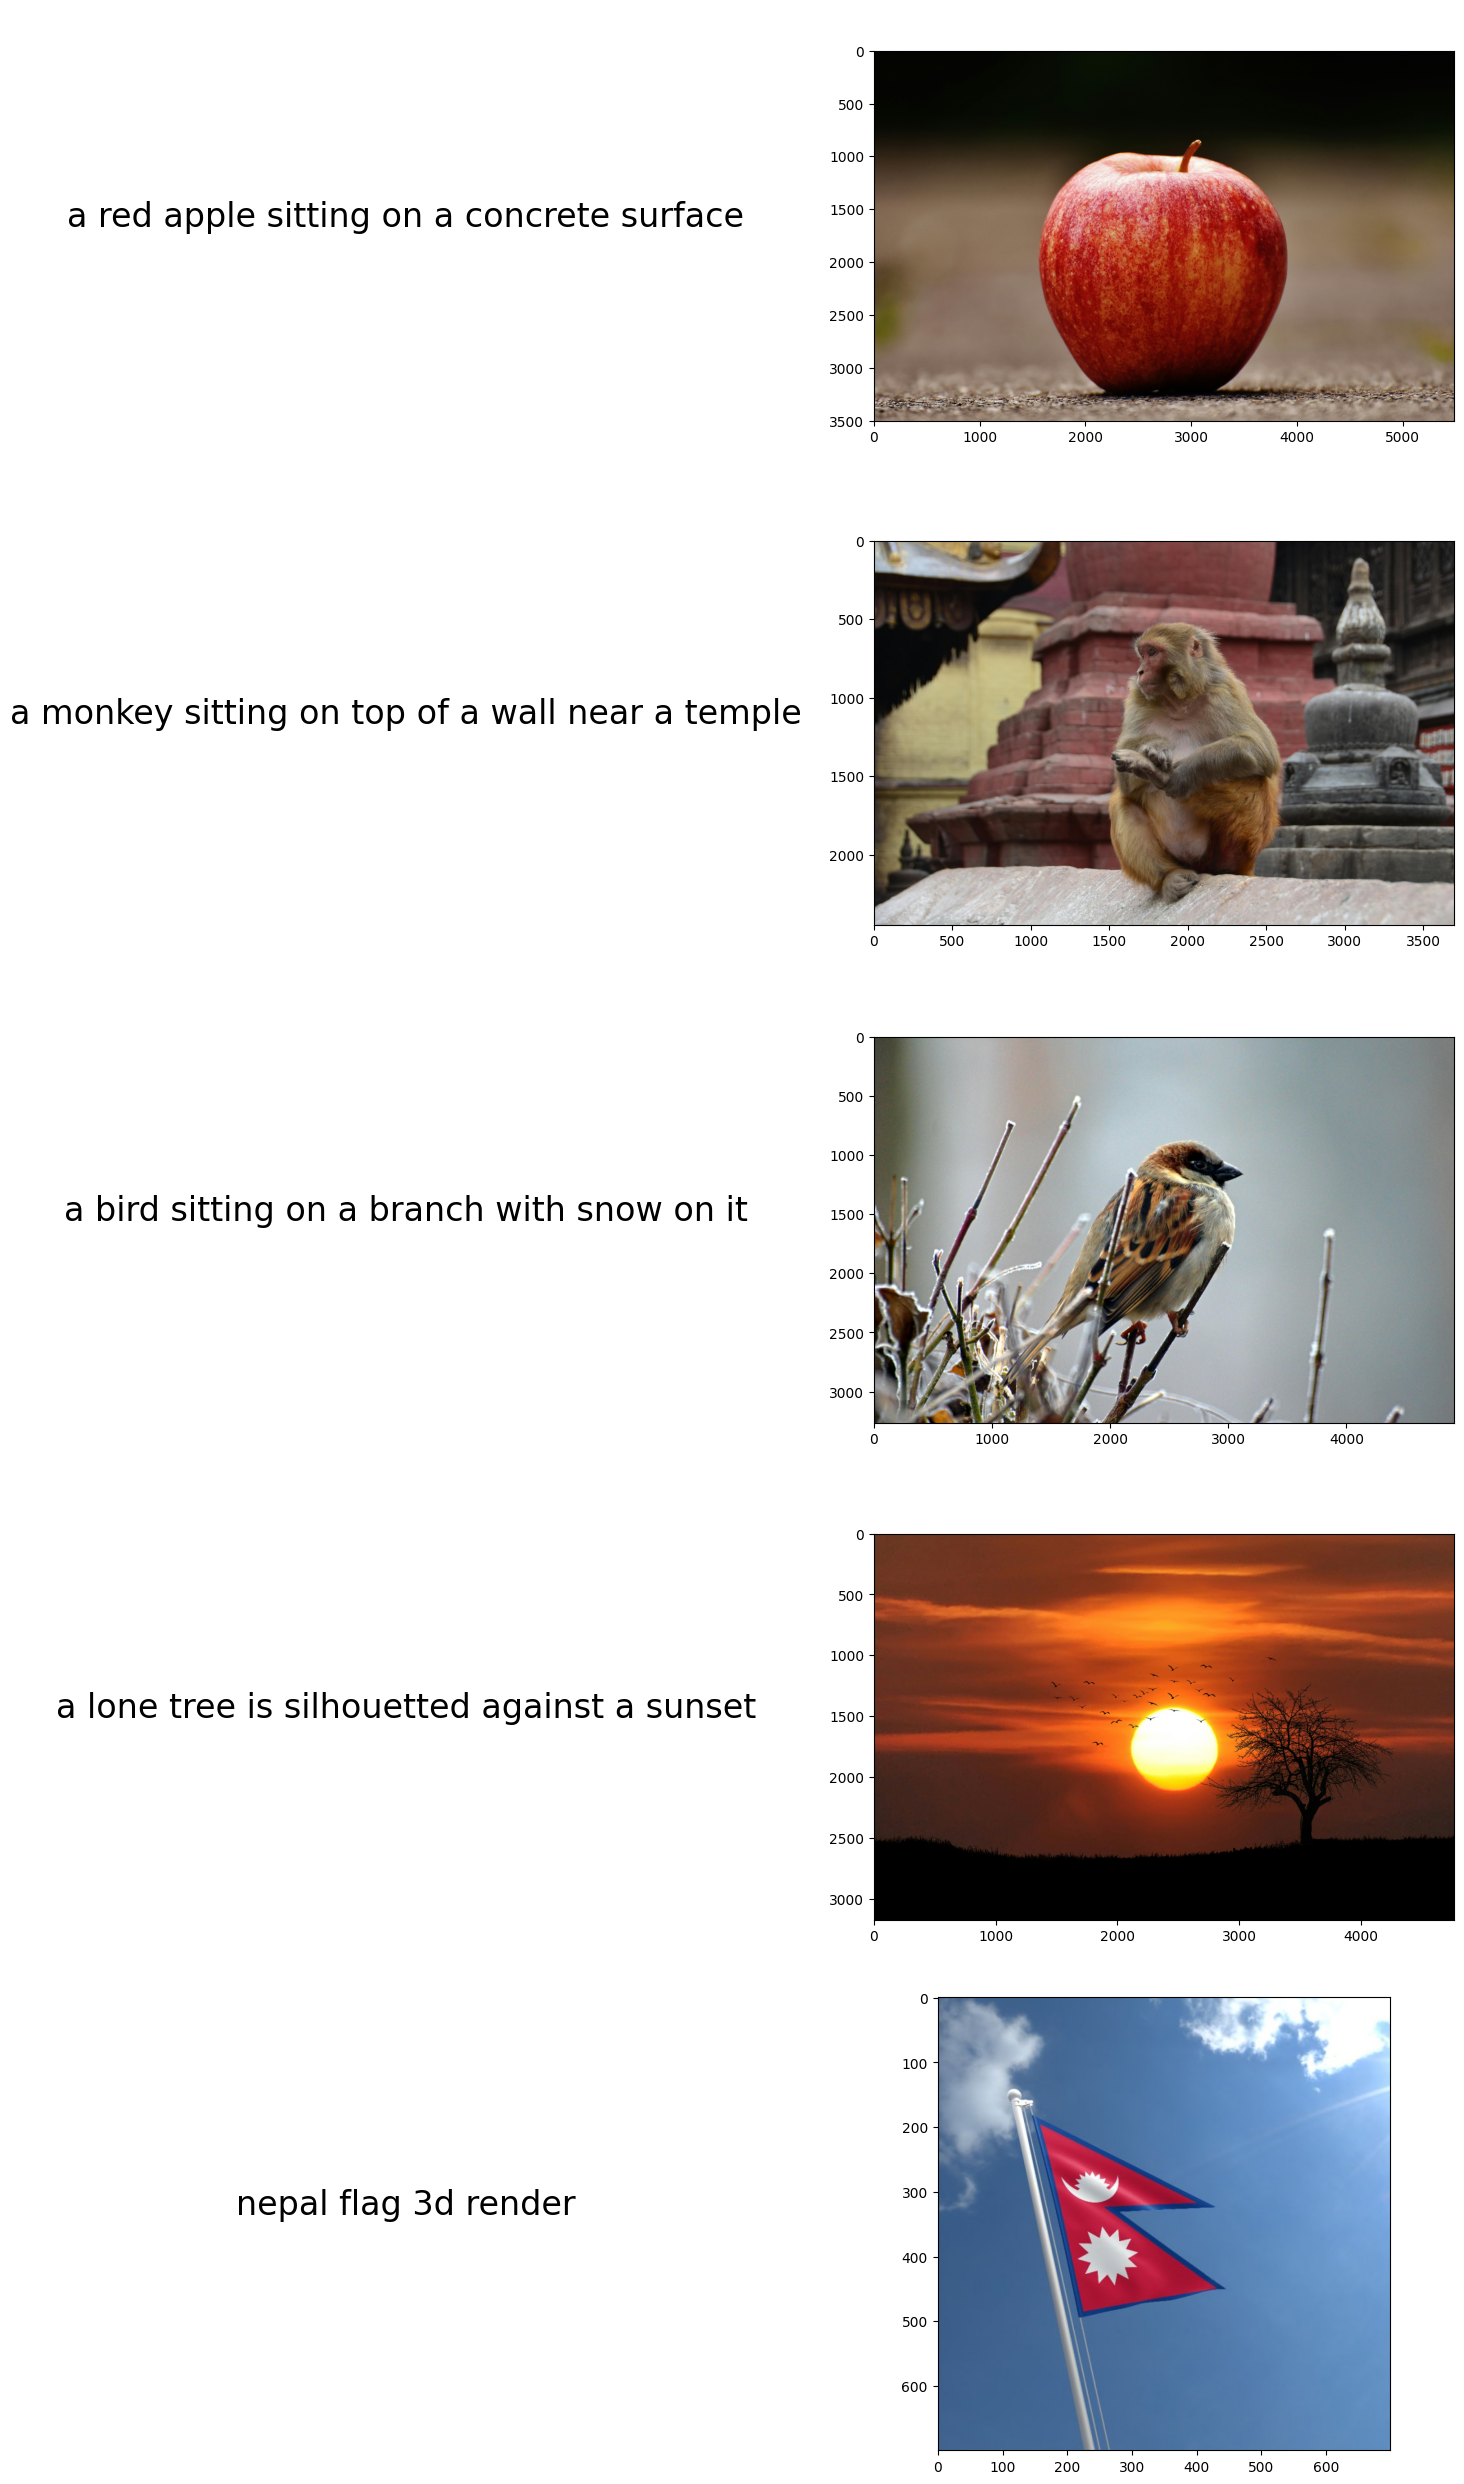

In [8]:
fig, axes = plt.subplots(len(fs_images), 2, figsize = (15, len(fs_images) * 5))

for i, single_image in enumerate(fs_images):
    axes[i, 0].text(0.5, 0.5, captions[i], ha="center", va="center", fontsize=24, wrap=True)
    axes[i,0].axis("off")
    
    
    image = Image.open(fs_images[i]).convert("RGB")
    axes[i,1].imshow(image)
    axes[i,0].axis("off")
    

plt.tight_layout()
plt.show()

## Talking with an image with the help of BLIP-2. 

The model not only is capable of zero-shot image-to-text generation but also is able to follow the instructions given in natural language. We will demonstrate that capability of the model below.

In [20]:
fs_image  = "../images/sunset.jpg"
image  = Image.open(fs_image).convert("RGB")
prompt = "Question: What animals are there in the image? Answer:"

inputs = processor(images=image, text=prompt, return_tensors = "pt").to( dtype= torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

Question: What animals are there in the image? Answer: The image shows a lone tree in the foreground with birds flying in the background

